In [245]:
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_boxplot, scale_y_continuous, labs, theme, coord_cartesian
from plotnine.themes import element_text

In [246]:
file_path = '/content/national_park_trails.csv'
data1 = pd.read_csv(file_path)
data1

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,15610.598,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",i
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",i
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18879, 'lng': -149.631}",17.7821,2896.812,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",i
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73661, 'lng': -148.915}",16.2674,3379.614,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",i
4,10236082,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73319, 'lng': -148.89682}",12.5935,29772.790,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3308,10008302,Silversword Loop Via Halemau'u Trail,Haleakala National Park,Kula,Maui,Hawaii,"{'lat': 20.75275, 'lng': -156.22884}",9.3861,20116.750,1105.8144,5,loop,2.0,4.5,43,"['dogs-no', 'views', 'wild-flowers']","['birding', 'hiking', 'nature-trips']",m
3309,10236001,Keonehe'ehe'e Trail,Haleakala National Park,Kula,Maui,Hawaii,"{'lat': 20.714480000000002, 'lng': -156.25072}",9.1555,28324.384,1171.9560,5,out and back,2.0,5.0,22,"['dogs-no', 'views', 'wildlife']","['backpacking', 'camping', 'hiking']",m
3310,10258707,Red Hill Overlook Summit Trail,Haleakala National Park,Kula,Maui,Hawaii,"{'lat': 20.71007, 'lng': -156.25357}",8.5066,321.868,3.9624,1,out and back,NaN,4.5,31,"['dogs-no', 'kids', 'views']","['hiking', 'walking']",m
3311,10014989,Kaupo Trail,Haleakala National Park,Kula,Maui,Hawaii,"{'lat': 20.64981, 'lng': -156.137}",8.3240,19312.080,1670.9136,5,out and back,1.0,4.0,8,"['dogs-no', 'views', 'wildlife']",['hiking'],m


What is the length in miles of the fourth longest trail in California?



In [247]:
california_trails = data1[data1["state_name"] == "California"]


In [248]:
sorted_california_trails1 = california_trails.sort_values(by="length", ascending=False)

In [249]:
length_in_meters = sorted_california_trails1.iloc[3]["length"]
meters_to_miles = 1 / 1609.34

In [250]:
length_in_miles = length_in_meters * meters_to_miles
length_in_miles


145.20000000000002

Which California National Park has the highest average rating of its "easy" trails?



In [251]:
easy_trails = (california_trails["elevation_gain"] < 500) & (california_trails["length"] < 5000) & (california_trails['difficulty_rating'] < 4)

In [252]:
easy_california_trails = california_trails[easy_trails]

In [253]:
average_rating_by_park = easy_california_trails.groupby("area_name")["avg_rating"].mean()

In [254]:
highest_avgerage_rating_park = average_rating_by_park.idxmax(), average_rating_by_park.max()
highest_avgerage_rating_park

('Kings Canyon National Park', 4.444444444444445)

3) How many National Parks contain the word "Land" somewhere in their name?  

(if the word appears as part of a longer word, like "Candyland", this counts too)

In [255]:
park_names = data1["name"].unique()

# Counting how many National Parks contain the word "Land" (case-insensitive) in their names
land_parks_count = sum("land" in park_name.lower() for park_name in unique_park_names)

print(land_parks_count)

61


4 Consider the following plot, made from a dataset called np_trails_new. Although you can see the code that made the plot, you do not see the code that made the np_trails_new object.

In [256]:
from plotnine import ggplot, aes, geom_density, facet_wrap, ggtitle

np_trails_new = data1[data1["state_name"] == "California"]

(ggplot(np_trails_new, aes(x = "score"))
+ geom_density()
+ facet_wrap("measure", scales = "free")
+ ggtitle("Overall distribution of various trail scores in National parks")
)

PlotnineError: ignored

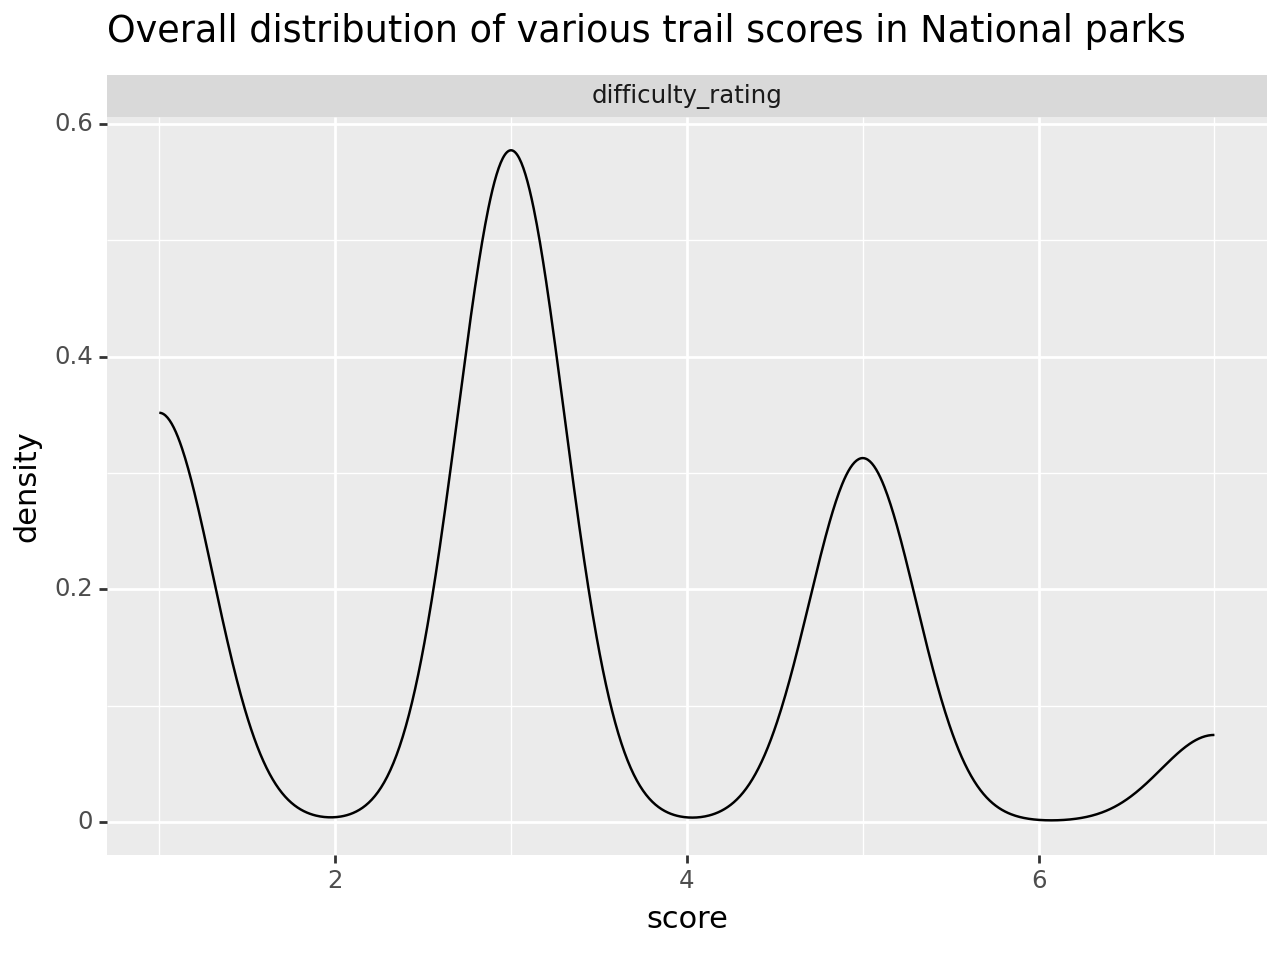

<Figure Size: (640 x 480)>

In [257]:
import pandas as pd
from plotnine import ggplot, aes, geom_density, facet_wrap, ggtitle

np_trails_new = np_trails[['avg_rating', 'difficulty_rating']].copy()
np_trails_new = np_trails_new.melt(id_vars='avg_rating', var_name='measure', value_name='score')

(ggplot(np_trails_new, aes(x='score'))
 + geom_density()
 + facet_wrap('~ measure', scales='free')
 + ggtitle("Overall distribution of various trail scores in National parks"))

5)ecreate the plot below, by filling in the blanks in the code on Canvas.

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 4 rows containing non-finite values.


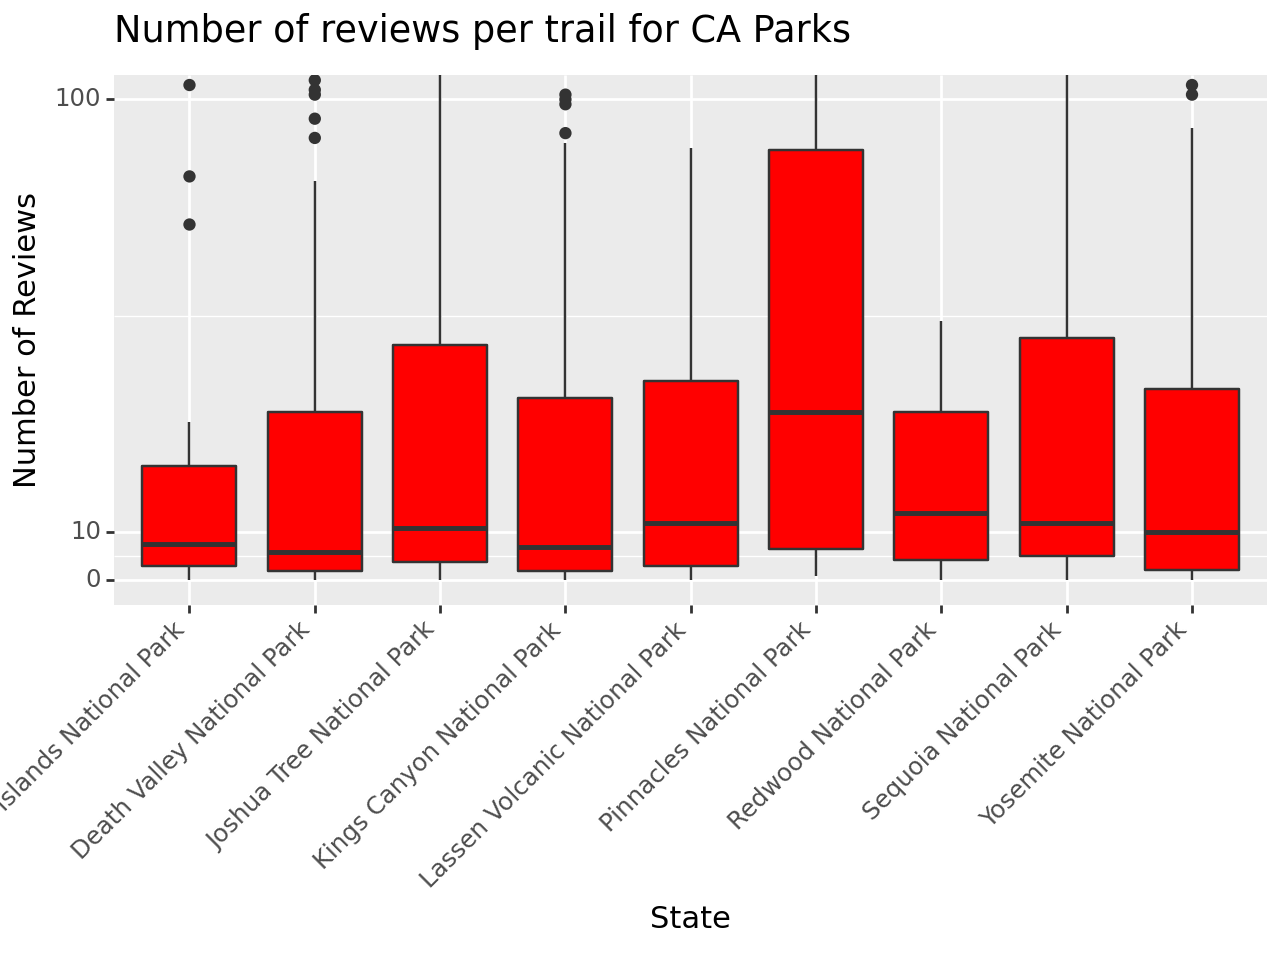

<Figure Size: (640 x 480)>

In [258]:
California_Parks = data1[data1["state_name"] == "California"]

(ggplot(California_Parks, aes(x = "factor(area_name)", y = "num_reviews", fill = "state_name"))
 + geom_boxplot()
 + scale_y_continuous(
     breaks=[0, 10, 100, 1000],
     limits=(0, 1000)  )

+ scale_fill_manual(values=["red","orange","yellow", "green", "cyan", "blue", "indigo", "violet"], guide = False)
 + labs(
     x = "State",
     y = "Number of Reviews",
     title = "Number of reviews per trail for CA Parks"
 )
 + coord_cartesian(ylim=(0, 100))

 + theme(axis_text_x=element_text(rotation=45, hjust=1))
)

Question 2.1

In [259]:
def recommend_trails(data, park_name, min_elev=0, max_elev=float("inf"), min_rating=0, trail_type = None):

  trails = data[data["area_name"] == park_name]

  trails = trails[trails["elevation_gain"] >= min_elev]

  trails = trails[trails["elevation_gain"] <= max_elev]

  trails = trails[trails["avg_rating"] >= min_rating]

  if trail_type is not None:

    trails = trails[trails["route_type"] == trail_type]

    return trails

np_trails = data1

In [260]:
# Example
recommend_trails(np_trails, "Haleakala National Park", min_elev = 1000, min_rating = 4)

Question 2.2 It’s reasonable to think we might also want to search for hikes according to climate. Therefore, we will scrape the average temperatures for each U.S. state from the following website:

In [261]:
import requests
from bs4 import BeautifulSoup

def scrape_temps(month = None):

    base_url = "https://www.extremeweatherwatch.com/us-state-averages"

    if month:

        month_url = f"{base_url}/month-{month.lower()}"

    else:
        month_url = base_url

    response = requests.get(month_url)
    soup = BeautifulSoup(response.content, "html.parser")
    table = soup.find_all("table",
                  attrs={"class": "bordered-table sort-table"})[0]
    data = []

    for row in table.find_all("tr")[1:]:

      cells = row.find_all("td")

      if len(cells) > 0:

        city = cells[0].get_text(strip=True)
        high = cells[1].get_text(strip=True)
        low = cells[2].get_text(strip=True)
        prec = cells[3].get_text(strip=True).split()[0]
        data.append([city, high, low, prec])
    df = pd.DataFrame(data, columns=["City", "high", "low", "prec"])

    return df

scrape_temps(month="january")

,City,high,low,prec
0,Alabama,56.1,34.5,5.3
1,Alaska,10.7,-2.4,2.8
2,Arizona,55.7,30.6,1.2
3,Arkansas,50.0,30.5,3.8
4,California,54.6,35.0,4.1
5,Colorado,38.9,13.7,1.1
6,Connecticut,36.0,18.5,3.6
7,Delaware,43.9,26.5,3.3
8,Florida,69.5,47.0,3.3
9,Georgia,57.8,35.6,4.5


Question 2.3

In [262]:
recommend_trails(np_trails, "Haleakala National Park", min_elev = 1000, max_elev = 3000, min_rating = 4.5)

In [263]:
print(recommend_trails)

<function recommend_trails at 0x7e2ae6d903a0>


In [264]:
import pandas as pd

def recommend_trails(df):
    filtered_trails = df[
        (df['elevation_gain'] >= 1000) & (df['elevation_gain'] <= 3000) &
        (df['avg_rating'] >= 4.5) &
        (df['route_type'] == 'loop')
    ]
    return filtered_trails

def scrape_temps(states):
    summer_temps = scrape_temps[scrape_temps['state'].isin(states)]
    return summer_temps

# Step 1: Filter Trails
recommended_trails = recommend_trails(np_trails)

# Step 2: Scrape Temperature Data or Load from CSV
states = recommended_trails['state_name'].unique()
summer_temps = scrape_temps(states)

# Step 3: Merge Data
merged_data = pd.merge(recommended_trails, summer_temps, left_on='state_name', right_on='state')

# Step 4: Adjust Temperatures for Elevation
merged_data['adjusted_temp'] = merged_data['summer_temp'] - (merged_data['elevation_gain'] / 1000) * 5.4

# Step 5: Display Results
print(merged_data[['name', 'state_name', 'elevation_gain', 'avg_rating', 'adjusted_temp']])


TypeError: ignored